#Coding Assignment 1
Linear Regression Program - Salary and Experience
Author: Pralay Sankar Maitra

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


## load file

    YearsExperience      Salary2
0               1.1   1547871649
1               1.3   2134902025
2               1.5   1423628361
3               2.0   1894425625
4               2.2   1591291881
5               2.9   3208316164
6               3.0   3618022500
7               3.2   2964258025
8               3.2   4153158025
9               3.7   3270581721
10              3.9   3996515524
11              4.0   3112970436
12              4.0   3244099849
13              4.1   3258240561
14              4.5   3734554321
15              4.9   4615571844
16              5.1   4359828841
17              5.3   6903615744
18              5.9   6619937769
19              6.0   8824723600
20              6.8   8415860644
21              7.1   9657582529
22              7.9  10262095204
23              8.2  12953171344
24              8.7  11975143761
25              9.0  11147558724
26              9.5  13681746961
27              9.6  12686643225
28             10.3  14979556881
29        

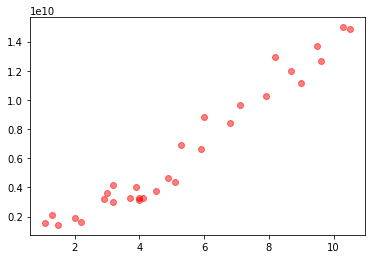

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/salary-experience-dataset.csv')
print(dataset)


plt.scatter(X, y, color='red', alpha=0.5)
plt.show()


In [ ]:
# Select only two features for our X
X = dataset['YearsExperience']
print(X)

# Target variable
y = dataset['Salary2']
#print(y)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64


## Train Test Split

In [ ]:
#reshape to 2D arrays
X_np = np.reshape(X.to_numpy(), (-1,1))
Y_np = np.reshape(y.to_numpy(), (-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, Y_np, test_size = 1/3, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(10, 1)
(20, 1)
(10, 1)


## Train using training split

In [ ]:

regressor_2 = LinearRegression()
regressor_2.fit(X_train, y_train)

y_pred = regressor_2.predict(X_test)

print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

MSE 7.553137888572664e+17
MAE 712700962.637804


In [ ]:
# Print the coeffiecents (theta_1, theta_2, ...)
print('Coeffecients: ', regressor_2.coef_)

# Print the y-intercept (theta_0)
print('Intercept: ', regressor_2.intercept_)

Coeffecients:  [[1.46900295e+09]]
Intercept:  [-1.3079589e+09]


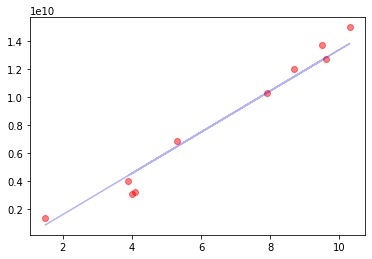

In [ ]:

plt.scatter(X_test, y_test, color='red', alpha=0.5)
plt.plot(X_test, y_pred, color='blue',  alpha=0.3)

## Generating Polynomial Features.

[[  1.     2.9    8.41]
 [  1.     5.1   26.01]
 [  1.     3.2   10.24]
 [  1.     4.5   20.25]
 [  1.     8.2   67.24]
 [  1.     6.8   46.24]
 [  1.     1.3    1.69]
 [  1.    10.5  110.25]
 [  1.     3.     9.  ]
 [  1.     2.2    4.84]
 [  1.     5.9   34.81]
 [  1.     6.    36.  ]
 [  1.     3.7   13.69]
 [  1.     3.2   10.24]
 [  1.     9.    81.  ]
 [  1.     2.     4.  ]
 [  1.     1.1    1.21]
 [  1.     7.1   50.41]
 [  1.     4.9   24.01]
 [  1.     4.    16.  ]]


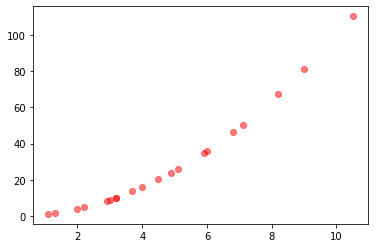

In [ ]:
# https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)
#x_poly = polynomial_features.fit_transform(X)
x_train_poly =  polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.transform(X_test)
print(x_train_poly)

plt.scatter(x_train_poly[:,1], x_train_poly[:,2], color='red', alpha=0.5)
#plt.scatter(, y_train, color='blue',  alpha=0.2)

## Fit a linear regressor on this polynomial feature data

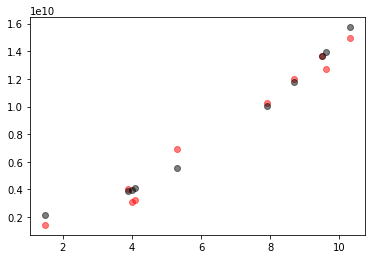

In [ ]:
# Fit using only the 2nd degree feature
x_train_poly_2 = np.reshape(x_train_poly[:,2], (-1,1))
x_test_poly_2 = np.reshape(x_test_poly[:,2], (-1,1))

model_poly = LinearRegression()
model_poly.fit(x_train_poly_2, y_train)

y_poly_pred = model_poly.predict(x_test_poly_2)

# Visualising the Y and X results
plt.scatter(X_test, y_test, color='red', alpha=0.5)
plt.scatter(X_test, y_poly_pred, color='black', alpha=0.5)
plt.show()

In [ ]:
print('MSE', mean_squared_error(y_test, y_poly_pred))
print('MAE', mean_absolute_error(y_test, y_poly_pred))

MSE 6.014496235291625e+17
MAE 634951674.4367009
